In [1]:
#Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [2]:
#Read csv files from the instructions folder.
crypto_df = pd.read_csv('Instructions/crypto_data.csv')
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
# Filter currencies that are currently being traded
crypto_df = crypto_df[crypto_df['IsTrading'] == True]
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [4]:
# Keep only cryptocurrencies with a working algorithm
crypto_df = crypto_df.loc[crypto_df['Algorithm'] != 'N/A']

In [5]:
# Remove the 'IsTrading' column
crypto_df = crypto_df.drop(columns = 'IsTrading')

In [6]:
# Remove rows with at least 1 null value
crypto_df.isnull().sum()

Unnamed: 0           0
CoinName             0
Algorithm            0
ProofType            0
TotalCoinsMined    459
TotalCoinSupply      0
dtype: int64

In [7]:
crypto_df = crypto_df.dropna()
crypto_df.isnull().sum()

Unnamed: 0         0
CoinName           0
Algorithm          0
ProofType          0
TotalCoinsMined    0
TotalCoinSupply    0
dtype: int64

In [8]:
# Filter rows of cryptocurrencies having no coins mined
crypto_df = crypto_df.loc[crypto_df['TotalCoinsMined'] != 0]

In [9]:
# Drop rows where there are 'N/A' text values
crypto_df = crypto_df[crypto_df!='N/A']

In [10]:
crypto_df['TotalCoinSupply'] = crypto_df['TotalCoinSupply'].astype(float)
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533 entries, 0 to 1247
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       533 non-null    object 
 1   CoinName         533 non-null    object 
 2   Algorithm        533 non-null    object 
 3   ProofType        533 non-null    object 
 4   TotalCoinsMined  533 non-null    float64
 5   TotalCoinSupply  533 non-null    float64
dtypes: float64(2), object(4)
memory usage: 29.1+ KB


In [11]:
# Drop the 'CoinName' column
crypto_df = crypto_df.drop(columns = 'CoinName')
crypto_df.head()

,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01
2,404,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08
5,1337,X13,PoW/PoS,2.927942e+10,3.141593e+11
7,BTC,SHA-256,PoW,1.792718e+07,2.100000e+07
8,ETH,Ethash,PoW,1.076842e+08,0.000000e+00


In [12]:
# Drop Unamed:0 columns
crypto_df = crypto_df.drop(columns=['Unnamed: 0'])
crypto_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01
2,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08
5,X13,PoW/PoS,2.927942e+10,3.141593e+11
7,SHA-256,PoW,1.792718e+07,2.100000e+07
8,Ethash,PoW,1.076842e+08,0.000000e+00
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2.000000e+09
1242,Scrypt,PoW/PoS,1.493105e+07,2.500000e+08
1245,CryptoNight,PoW,9.802226e+08,1.400223e+09
1246,Equihash,PoW,7.296538e+06,2.100000e+07


In [19]:
# Use get_dummies() to create variables for text features.
X = pd.get_dummies(crypto_df, columns=["Algorithm", "ProofType"]).reset_index(drop=True)
X.head(10)

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6.303924e+07,8.400000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,9.031294e+06,2.200000e+07,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.720114e+07,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.133597e+08,2.100000e+08,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,7.383056e+06,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# Standardize data
crypto_scaled = StandardScaler().fit_transform(X)


# Dimensionality Reduction <br>

PCA

In [21]:
# Use PCA to reduce dimensions
pca = PCA(n_components=0.90)

# Get principal components for the crypto data.
crypto_pca = pca.fit_transform(crypto_scaled)


# Display the shape of the PCA model output
crypto_pca.shape

(533, 75)

In [22]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=200)
tsne_features = tsne.fit_transform(crypto_pca)
tsne_features.shape

(533, 2)

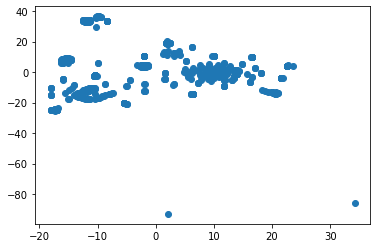

In [23]:
# plot the t-SNE output
x = tsne_features[:,0]
y = tsne_features[:,1]
plt.scatter(x, y)
plt.show()

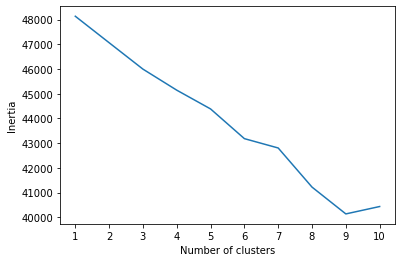

In [30]:
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values from 1-10
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypto_pca)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

### Based on the analysis elbow curve is not clear. I would not recommend the client invest in the current cryptocurrencies on the trading market.